In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer
#powered by: https://drawdata.xyz/

In [49]:
df = pd.read_clipboard(sep=',')

In [50]:
X = df[['x','y']].values
y = df['z'] #== 'a'
y.replace(['a','b','c'],[0,1,2], inplace=True )

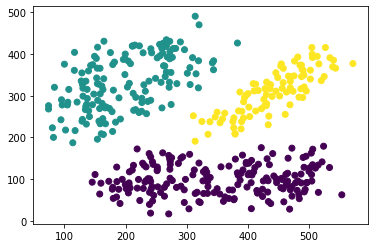

In [51]:
plt.scatter(X[:,0], X[:,1], c=y)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn.pipeline import Pipeline

In [162]:
knn = KNeighborsClassifier(n_neighbors=3)

In [163]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [164]:
knn.predict([[300,400]])

array([1])

In [165]:
pipe = Pipeline([
    ('knn', KNeighborsClassifier()),
]);

In [205]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid={
        'knn__n_neighbors': range(1, 15)
    },
    scoring={
        'accuracy': make_scorer(accuracy_score)
    },
    refit='accuracy'
)

In [206]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('knn', KNeighborsClassifier())],
 'estimator__verbose': False,
 'estimator__knn': KNeighborsClassifier(),
 'estimator__knn__algorithm': 'auto',
 'estimator__knn__leaf_size': 30,
 'estimator__knn__metric': 'minkowski',
 'estimator__knn__metric_params': None,
 'estimator__knn__n_jobs': None,
 'estimator__knn__n_neighbors': 5,
 'estimator__knn__p': 2,
 'estimator__knn__weights': 'uniform',
 'estimator': Pipeline(steps=[('knn', KNeighborsClassifier())]),
 'n_jobs': None,
 'param_grid': {'knn__n_neighbors': range(1, 15)},
 'pre_dispatch': '2*n_jobs',
 'refit': 'accuracy',
 'return_train_score': False,
 'scoring': {'accuracy': make_scorer(accuracy_score)},
 'verbose': 0}

In [207]:
grid.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 15)}, refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score)})

In [208]:
grid.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [209]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.001790,0.001533,0.003471,0.000511,1,{'knn__n_neighbors': 1},1.0,1.0,0.976744,1.0,1.000000,0.995349,0.009302,1
1,0.000771,0.000078,0.002667,0.000222,2,{'knn__n_neighbors': 2},1.0,1.0,0.965116,1.0,1.000000,0.993023,0.013953,2
2,0.000692,0.000007,0.002509,0.000063,3,{'knn__n_neighbors': 3},1.0,1.0,0.976744,1.0,0.976471,0.990643,0.011460,14
3,0.000617,0.000055,0.002105,0.000189,4,{'knn__n_neighbors': 4},1.0,1.0,0.965116,1.0,0.988235,0.990670,0.013565,8
4,0.000536,0.000008,0.001955,0.000081,5,{'knn__n_neighbors': 5},1.0,1.0,0.976744,1.0,0.988235,0.992996,0.009316,3
5,0.000540,0.000007,0.002196,0.000378,6,{'knn__n_neighbors': 6},1.0,1.0,0.976744,1.0,0.988235,0.992996,0.009316,3
6,0.000542,0.000006,0.001953,0.000023,7,{'knn__n_neighbors': 7},1.0,1.0,0.976744,1.0,0.988235,0.992996,0.009316,3
7,0.000564,0.000068,0.001967,0.000043,8,{'knn__n_neighbors': 8},1.0,1.0,0.976744,1.0,0.988235,0.992996,0.009316,3
8,0.000553,0.000037,0.001994,0.000076,9,{'knn__n_neighbors': 9},1.0,1.0,0.976744,1.0,0.988235,0.992996,0.009316,3
9,0.000558,0.000015,0.002100,0.000173,10,{'knn__n_neighbors': 10},1.0,1.0,0.965116,1.0,0.988235,0.990670,0.013565,8


In [186]:
list(range(10, 15))

[10, 11, 12, 13, 14]

/home/esantiago/anaconda3/envs/ml-basics/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


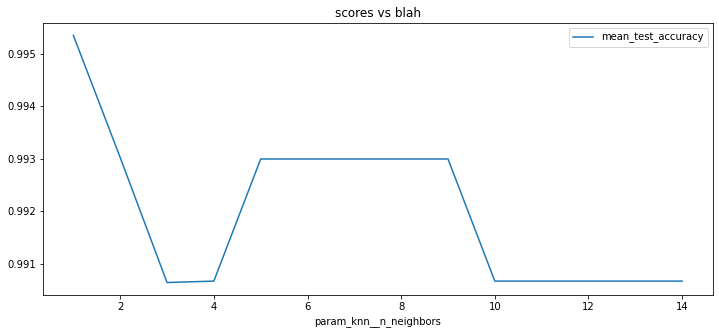

In [211]:
score = (pd.DataFrame(grid.cv_results_).set_index('param_knn__n_neighbors')
        [['mean_test_accuracy']])
score.plot(figsize=(12,5), title="scores vs blah");